# Домашнее задание №7. И снова Pandas
Задания опираются на материалы лекции.

In [1]:
import pandas as pd
movies = pd.read_csv("movies_metadata.csv")
ratings = pd.read_csv("ratings_small.csv")

C:\Users\murza\AppData\Local\Temp\ipykernel_24780\3908799901.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("movies_metadata.csv")


## Задание 1
Определите, сколько фильмов в датасете с незаполненным бюджетом (0 или nan).

Подготовка данных:

In [2]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce').astype('Int64')

Решение задания 1:

In [3]:
answer = movies[movies["budget"].isna() | (movies["budget"] == 0)].shape[0]
print(answer)

36576


## Задание 2
Как изменится поведение модели предсказания рейтинга по бюджету и популярности, если убрать все объекты с нулями?

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Подготовка данных + merge

In [5]:
movies.id = pd.to_numeric(movies.id, errors='coerce').astype('Int64')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce').astype('Int64')

# Соединение movies и ratings (merge)
data = pd.merge(ratings, movies, left_on='movieId', right_on='id')

data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

Обучение модели, тестирование, оценка качества

In [6]:
def model_realization(X, y):

    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация и обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Предсказание и оценка качества
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

ДО удаления всех значений = 0:

In [7]:
X = data[['budget', 'popularity']].dropna()
y = data['rating'].dropna()

model_realization(X, y)

Mean Squared Error: 1.125703620709614


ПОСЛЕ удаления:

In [8]:
mask = (X['budget'] != 0) & (X['popularity'] != 0) & (y != 0)
X_new = X[mask]
y_new = y[mask]

# Сбрашиваю индексы
X_new.reset_index(drop=True, inplace=True)
y_new.reset_index(drop=True, inplace=True)

model_realization(X_new, y_new)

Mean Squared Error: 1.0944140295786686


## Задание 3
Оставьте в оценках по фильму только среднюю оценку фильма, а не все оценки. Сделайте мердж, предсказывайте оценку, как в примере на лекции. Как изменится поведение модели?

Изменения

In [9]:
ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce').astype('Int64')

# Соединение movies и ratings (merge)
data2 = pd.merge(ratings, movies, left_on='movieId', right_on='id')

data2['popularity'] = pd.to_numeric(data2['popularity'], errors='coerce')
data2['rating'] = pd.to_numeric(data2['rating'], errors='coerce')

ДО удаления 0 значений

In [10]:
X = data2[['budget', 'popularity']].dropna()
y = data2['rating'].dropna()

model_realization(X, y)

Mean Squared Error: 0.7300053656515235


ПОСЛЕ удаления 0 значений

In [11]:
mask = (X['budget'] != 0) & (X['popularity'] != 0) & (y != 0)
X_new = X[mask]
y_new = y[mask]

# Сбрашиваю индексы
X_new.reset_index(drop=True, inplace=True)
y_new.reset_index(drop=True, inplace=True)

model_realization(X_new, y_new)

Mean Squared Error: 0.595071779117177


## Задание 4
Найдите все фильмы, которые были выпущены в тот же год, что и Матрица, имеют длину фильма в диапазоне +- 20 минут от длительности фильма Матрица.

In [12]:
import re

In [13]:
matrix = movies[movies['title'] == "The Matrix"]

release_data = matrix['release_date'].values[0]      # 1999-03-30
release_data = re.search(r'([0-9]{4})-[0-9]{2}-[0-9]{2}', release_data).group(1)   # 1999

matrix_length = int(matrix['runtime'].values[0])   # 136 минут

length_range = (matrix_length - 20, matrix_length + 20)

# Отбор фильмов по заданным критериям
filtered_movies = movies[movies['release_date'].notna() & 
                         movies['release_date'].str.startswith(release_data) &
                         movies['runtime'].between(length_range[0], length_range[1])]
print(filtered_movies["title"])

2124                  One Man's Hero
2323              Tea with Mussolini
2332                  At First Sight
2384             Message in a Bottle
2392                             8MM
                    ...             
40868                   Little Crumb
42950    Samurai X: Trust & Betrayal
44070                  The Jack Bull
44980       Batman Beyond: The Movie
45032       G:MT Greenwich Mean Time
Name: title, Length: 103, dtype: object


## Задание 5
Визуализируйте информацию о числе оценок и о средей оценке пользователей о фильме, но только среди фильмом из предыдущего пункта.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Число оценок

C:\Users\murza\AppData\Local\Temp\ipykernel_24780\2433251726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_movies["vote_count"].values, y=filtered_movies['title'], palette="viridis")


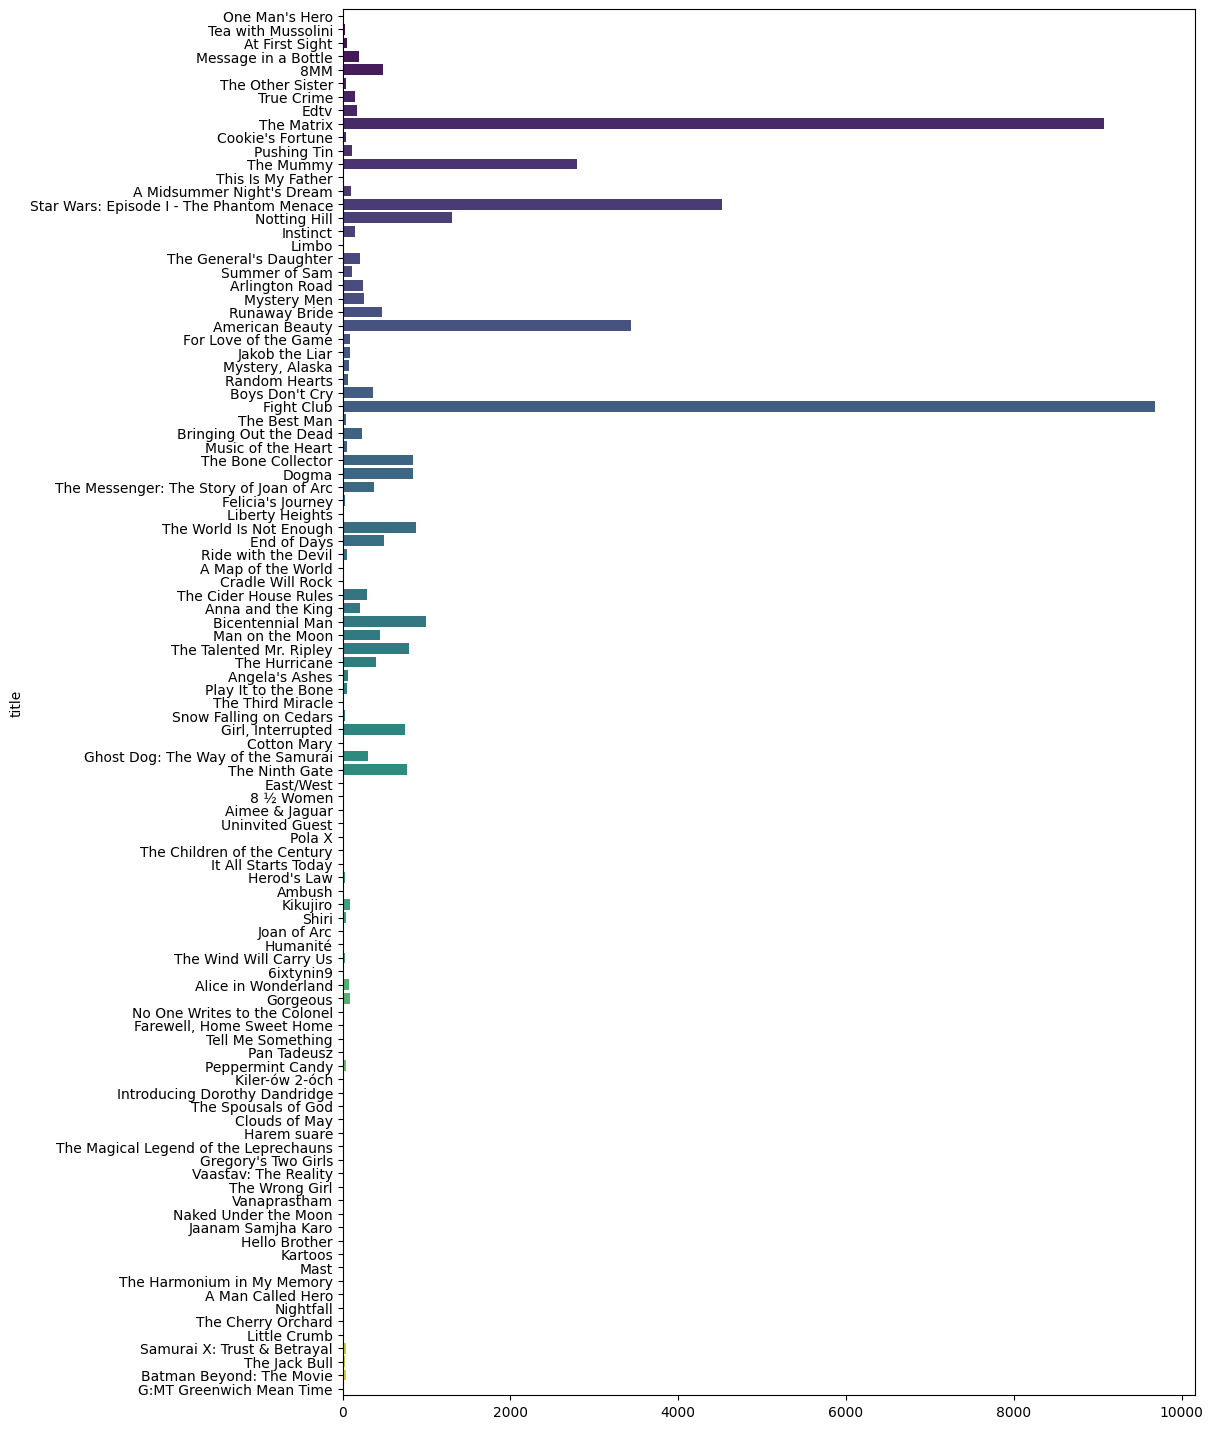

In [15]:
plt.figure(figsize=(11, 18))
plt.tight_layout()
sns.barplot(x=filtered_movies["vote_count"].values, y=filtered_movies['title'], palette="viridis")
plt.show()

Средняя оценка

C:\Users\murza\AppData\Local\Temp\ipykernel_24780\4263871712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_movies["vote_average"].values, y=filtered_movies['title'], palette="viridis")


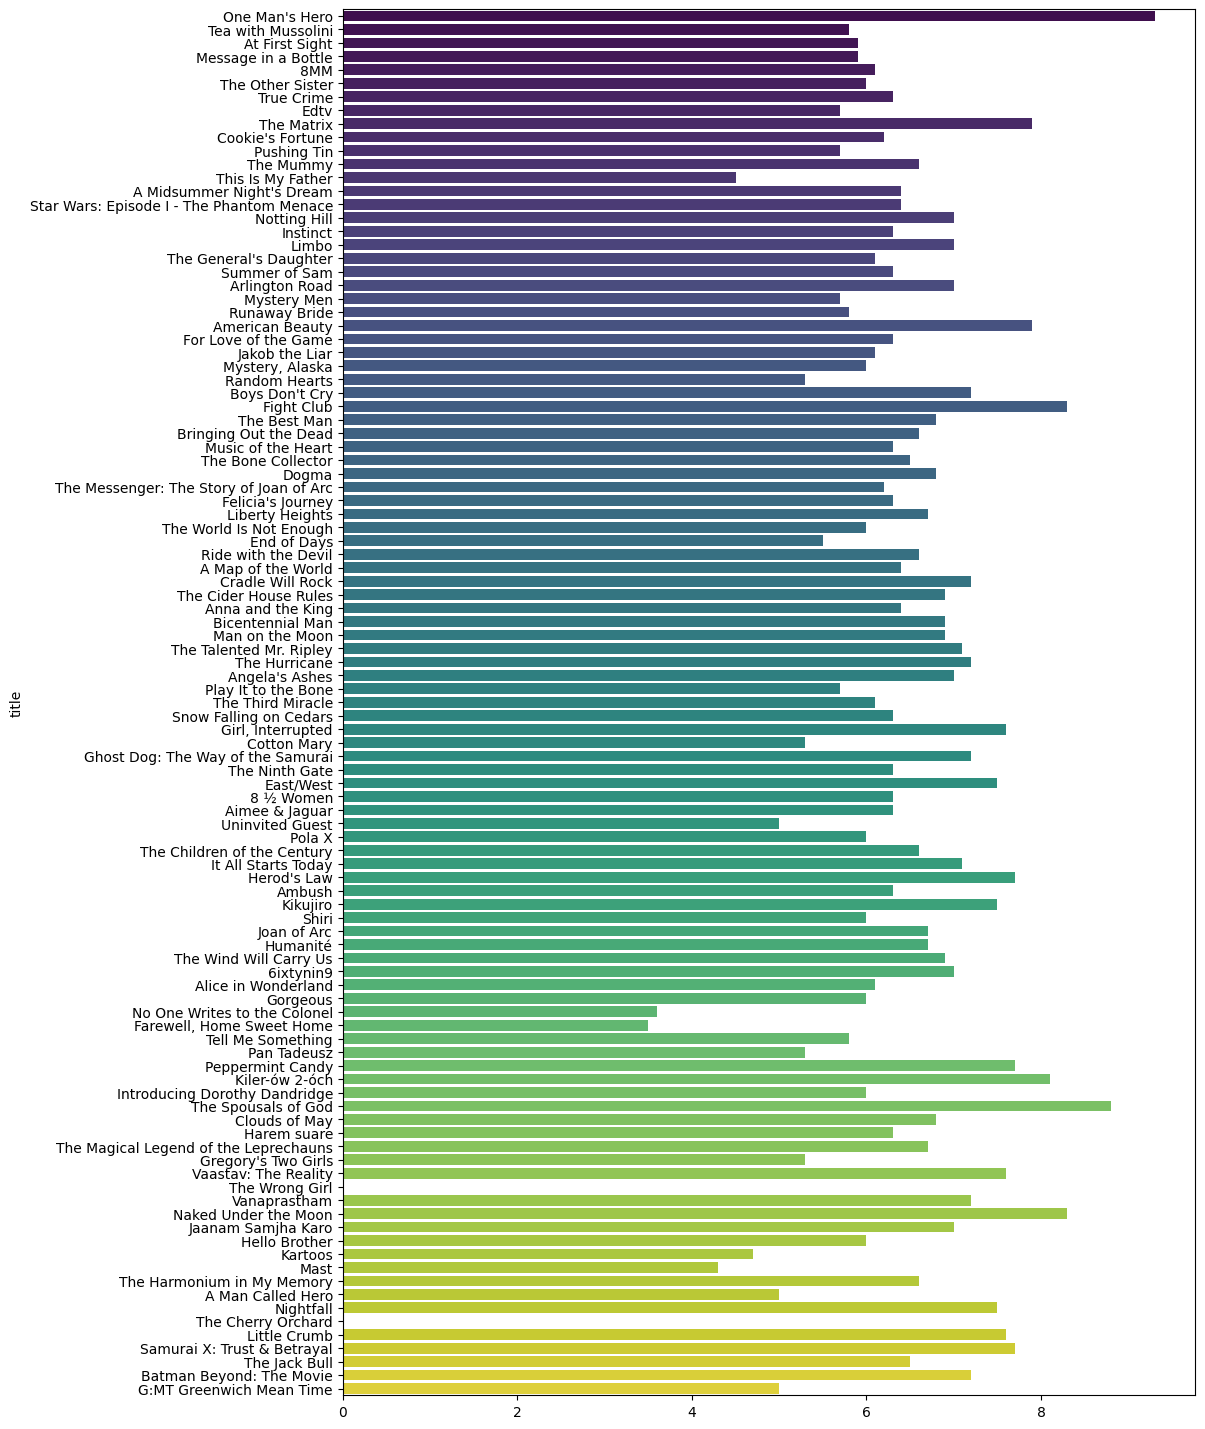

In [16]:
plt.figure(figsize=(11, 18))
plt.tight_layout()
sns.barplot(x=filtered_movies["vote_average"].values, y=filtered_movies['title'], palette="viridis")
plt.show()